# 1. What is catplot in Seaborn?

catplot stands for Categorical Plot — it's a multi-purpose function that creates several types of plots for categorical data.

Instead of writing separate code for barplot, boxplot, violinplot, etc., Seaborn gives us one convenient function:

### 1.1 Usage of catplot
sns.catplot()

You just specify the type of plot using the kind parameter.

# 2. Why Is catplot Useful?

it gives you a flexible and consistent way to:

Compare different plot types

Easily create subplots with col or row

Handle grouped/category data


# 3. Summary of cat plot

<table>
    <tr>
        <th>kind Value</th>
        <th>Plot Type</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>"strip"</td>
        <td>Strip Plot</td>
        <td>Dots for each value (can overlap)</td>
    </tr>
    <tr>
        <td>"swarm"</td>
        <td>Swarm Plot</td>
        <td>Dots without overlap</td>
    </tr>
    <tr>
        <td>"box"</td>
        <td>Box Plot</td>
        <td>Shows median, quartiles, outliers</td>
    </tr>
    <tr>
        <td>"violin"</td>
        <td>Violin Plot</td>
        <td>Box + density curve</td>
    </tr>
    <tr>
        <td>"bar"</td>
        <td>Bar Plot</td>
        <td>Shows mean (default) and error</td>
    </tr>
    <tr>
        <td>Point</td>
        <td>Point Plot</td>
        <td>Points and lines (trend over category)</td>
    </tr>
    <tr>
        <td>"count"</td>
        <td>Count Plot</td>
        <td>Shows count of each category</td>
    </tr>
</table>

# 4. When and Why Do We Use catplot?
<table>
    <tr>
        <th>Reason</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>To visualize categorical data</td>
        <td>Like gender, product line, day of the week</td>
    </tr>
    <tr>
        <td>To compare distributions</td>
        <td>See how values vary across groups</td>
    </tr>
    <tr>
        <td>For grouped plots (subplots)</td>
        <td>Use row and col to split by another category</td>
    </tr>
    <tr>
        <td>To experiment quickly</td>
        <td>Change kind to try different plots easily</td>
    </tr>

</table>


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
def load_dataset(df_name, file_path):
    file_path = file_path
    df_name = df_name
    
    df_name = pd.read_csv(file_path)
    if df_name is None:
        raise FileNotFoundError("File Path Not Found")
    
    df = pd.DataFrame(df_name)
    return df

In [3]:
df = load_dataset(file_path= r"D:\DataVisualizationForPython\datasets\supermarket_sales_utf8.csv",df_name = "sales")


# fix column names
def fix_column_names(dataframe):
    dataframe.columns = [col.lower().replace(" ", "_") for col in dataframe.columns]
    
# call the fix_column_names
fix_column_names(df)

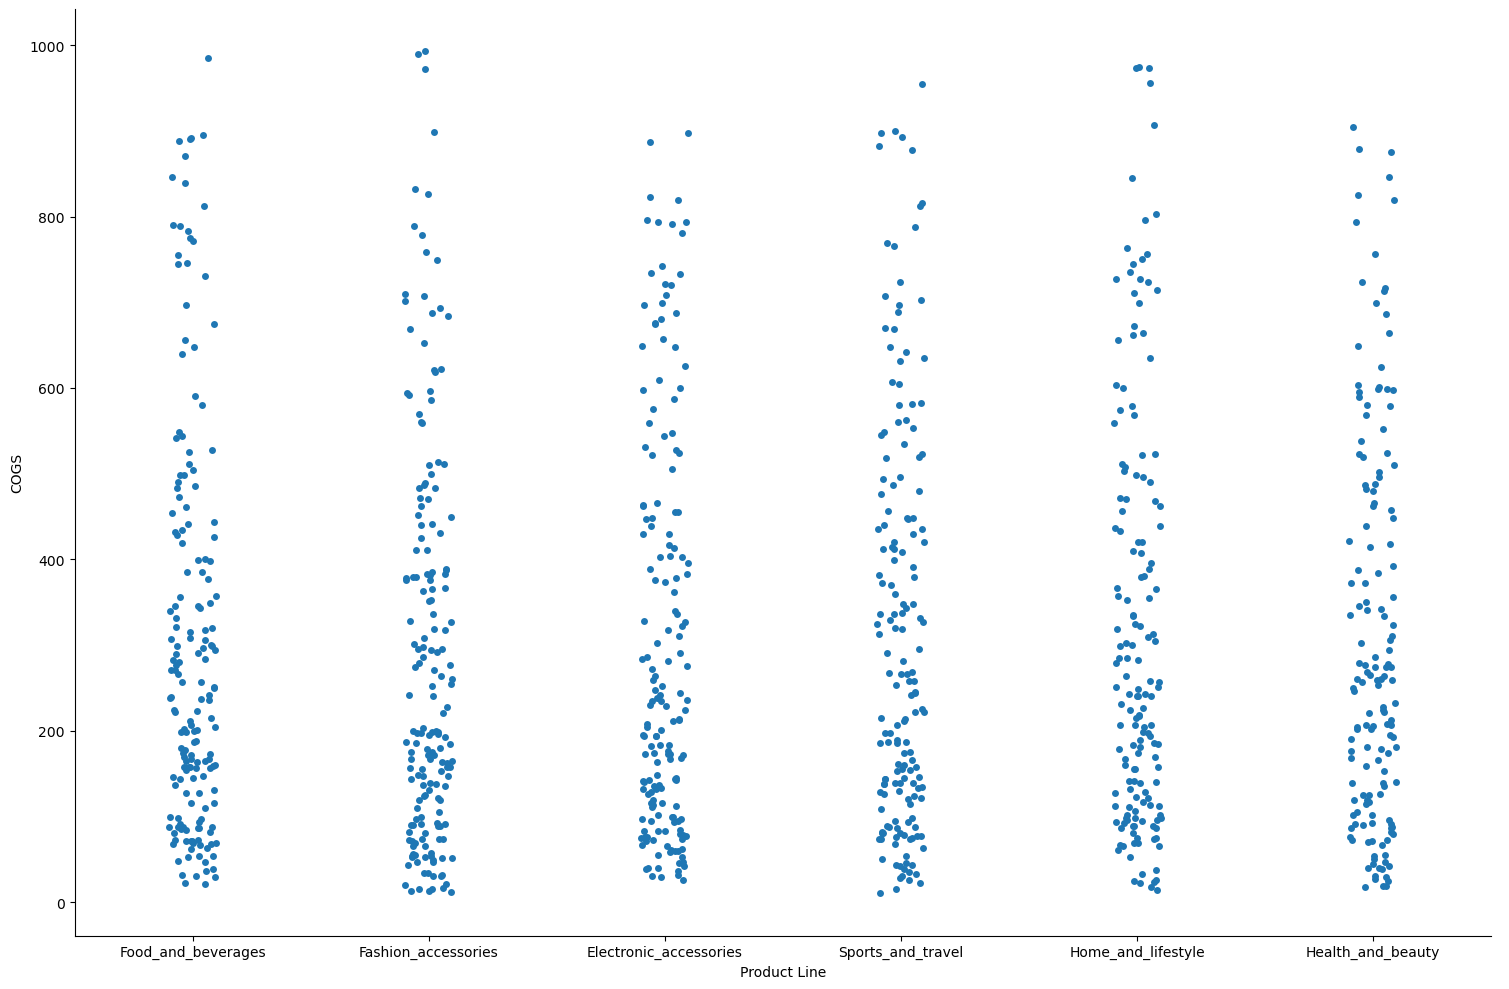

In [20]:
# catplots

sns.catplot(data = df, x = "product_line", y = "cogs", height= 10, aspect = 1.5)
plt.tight_layout()
plt.xlabel("Product Line")
plt.ylabel("COGS")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14860\3629905372.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df, x = "product_line", y = "cogs",kind = "box", height= 10, aspect = 1.5, palette="PuBuGn_r")


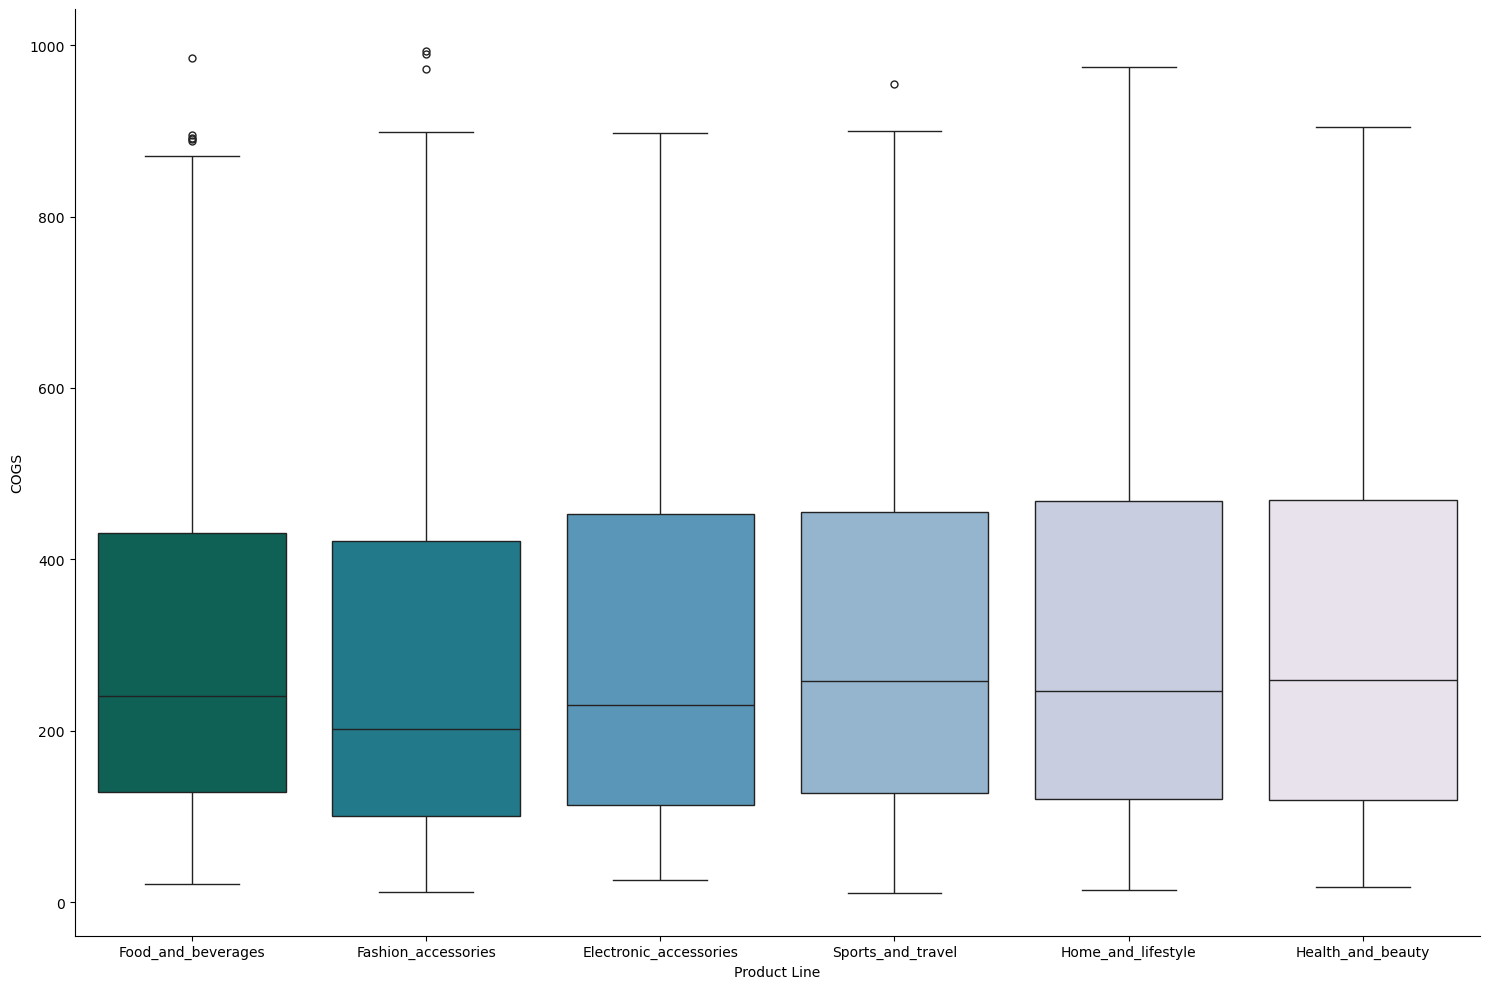

In [22]:
sns.catplot(data = df, x = "product_line", y = "cogs",kind = "box", height= 10, aspect = 1.5, palette="PuBuGn_r")
plt.tight_layout()
plt.xlabel("Product Line")
plt.ylabel("COGS")
plt.show()

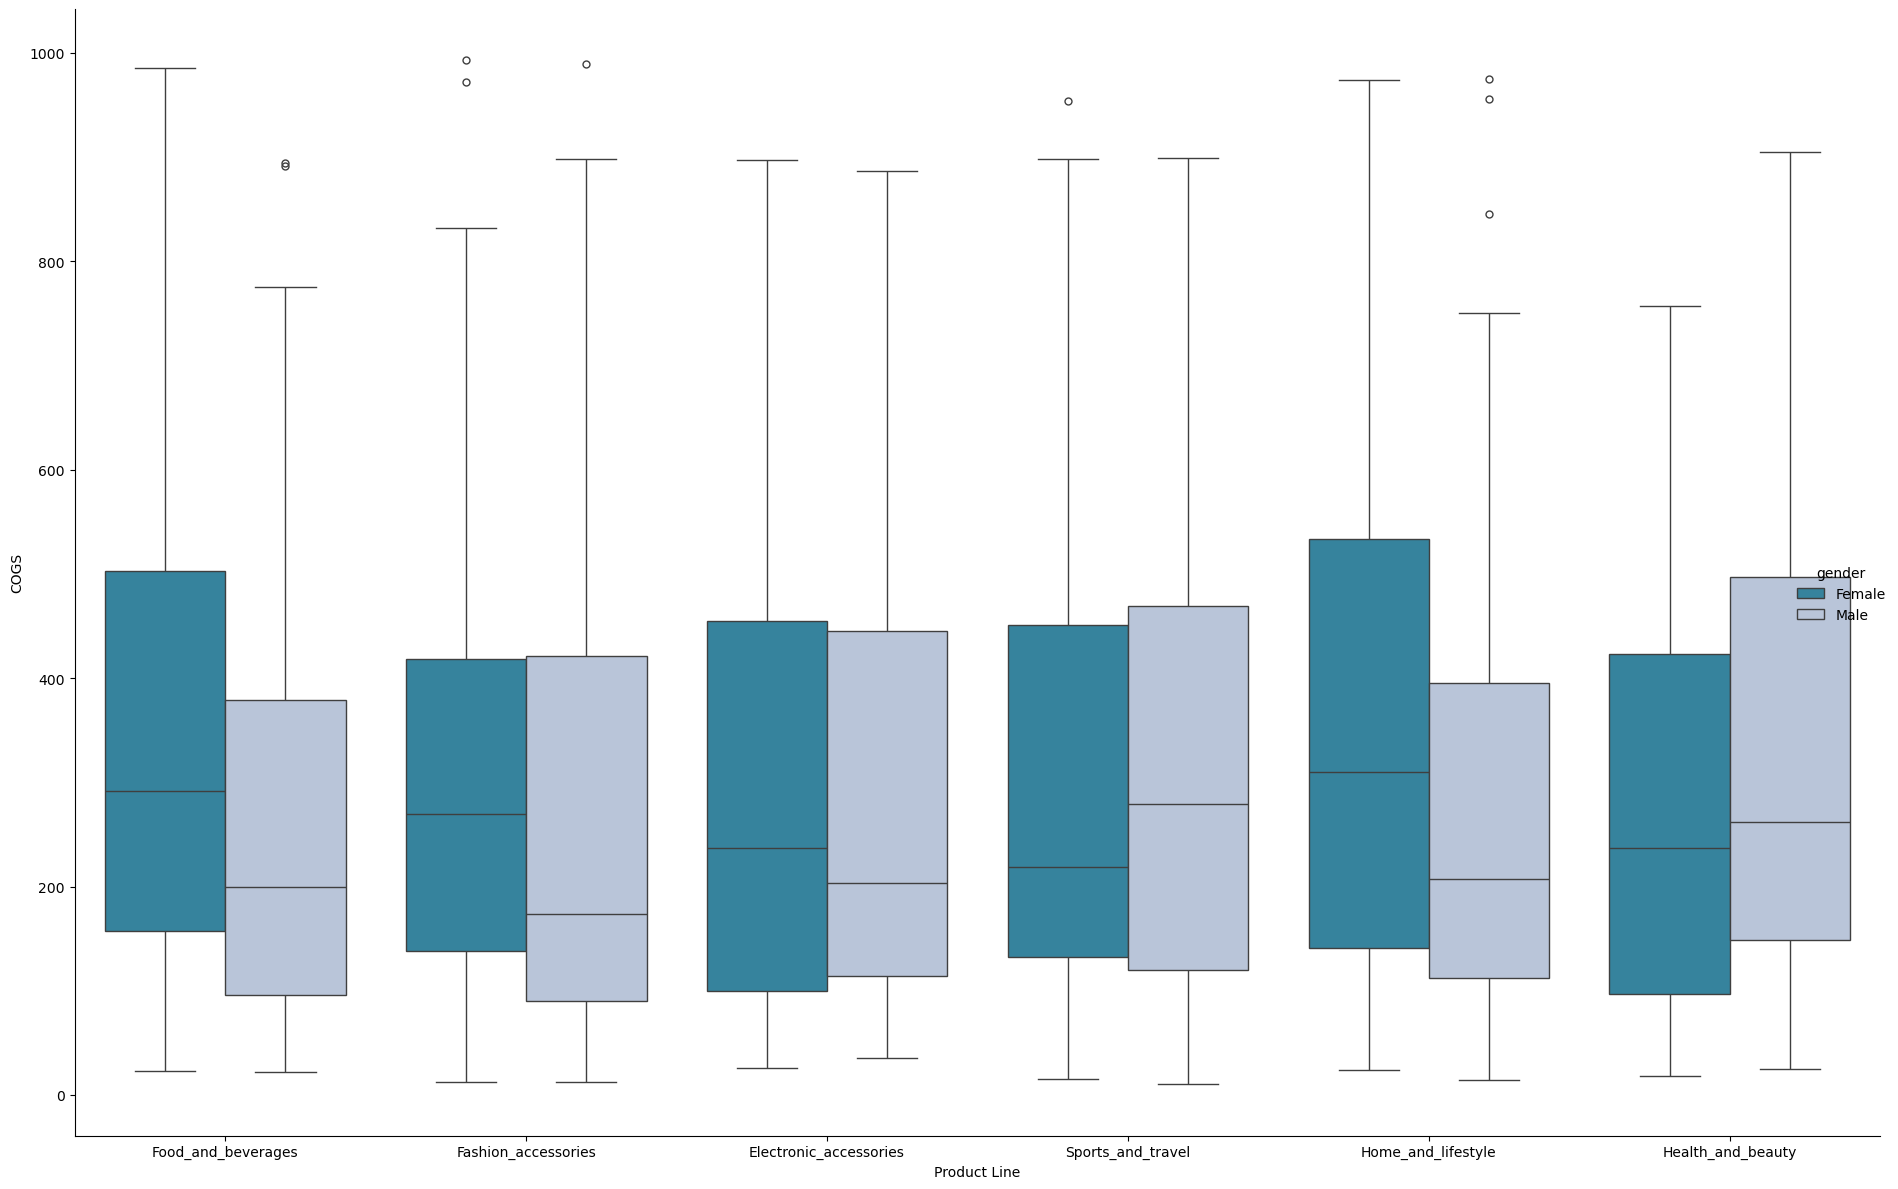

In [29]:
sns.catplot(data = df, x = "product_line", y = "cogs",kind = "box", hue = "gender", height= 12, aspect = 1.5, palette="PuBuGn_r")
plt.tight_layout()
plt.xlabel("Product Line")
plt.ylabel("COGS")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14860\2477015940.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df, x = "product_line", y = "cogs",kind = "violin", height= 10, aspect = 1.5, palette="PuBuGn_r")


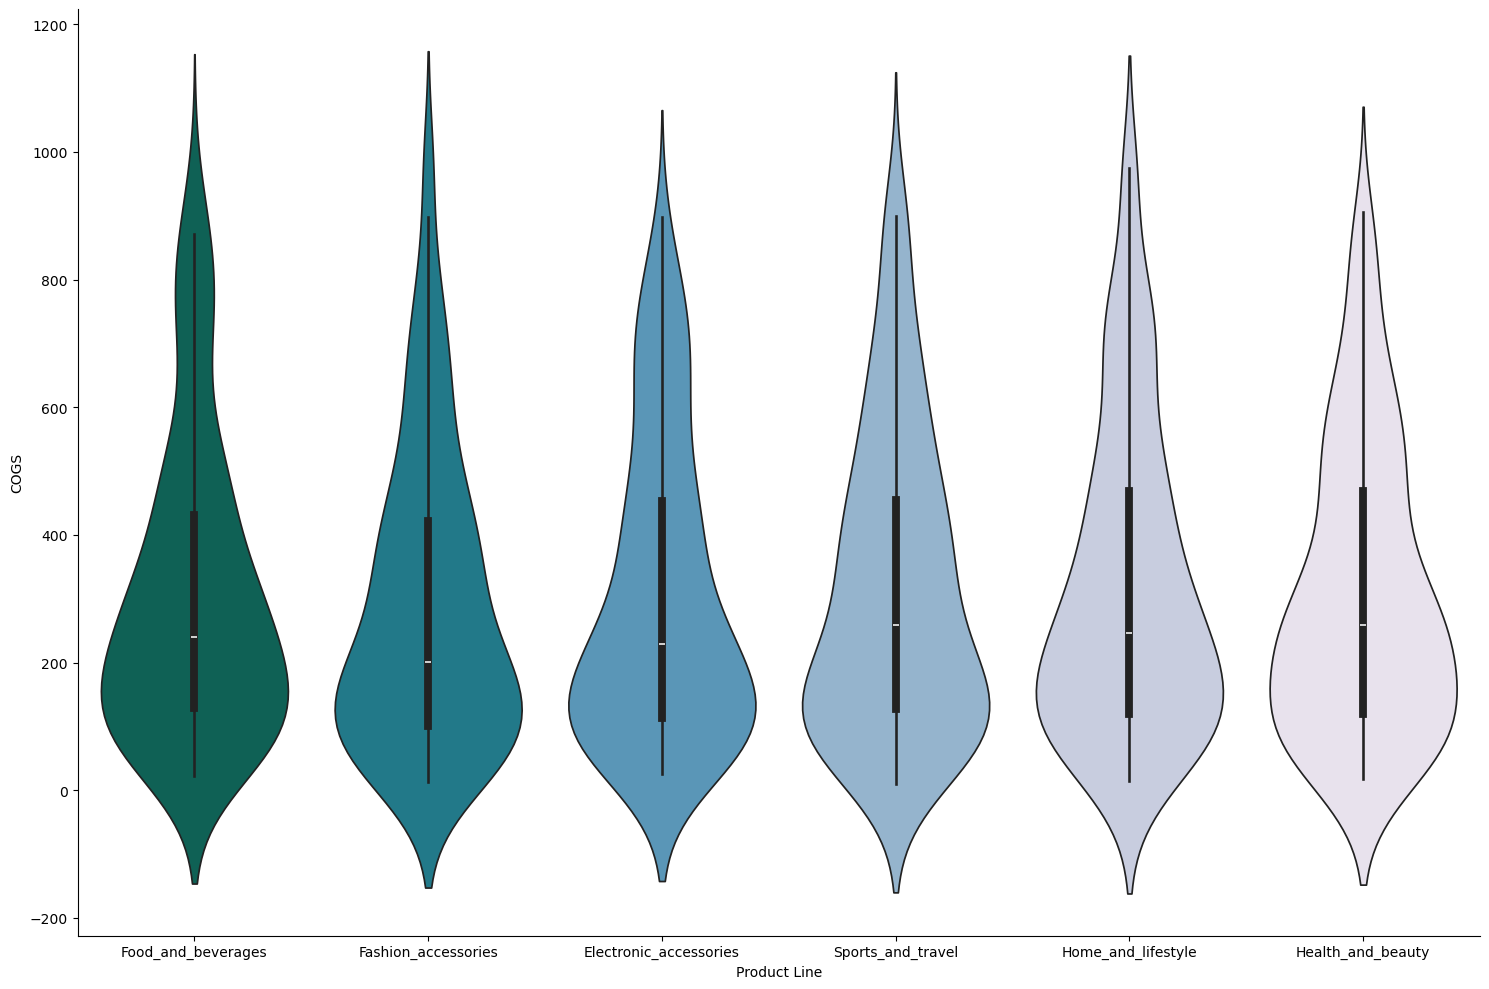

In [23]:
sns.catplot(data = df, x = "product_line", y = "cogs",kind = "violin", height= 10, aspect = 1.5, palette="PuBuGn_r")
plt.tight_layout()
plt.xlabel("Product Line")
plt.ylabel("COGS")
plt.show()

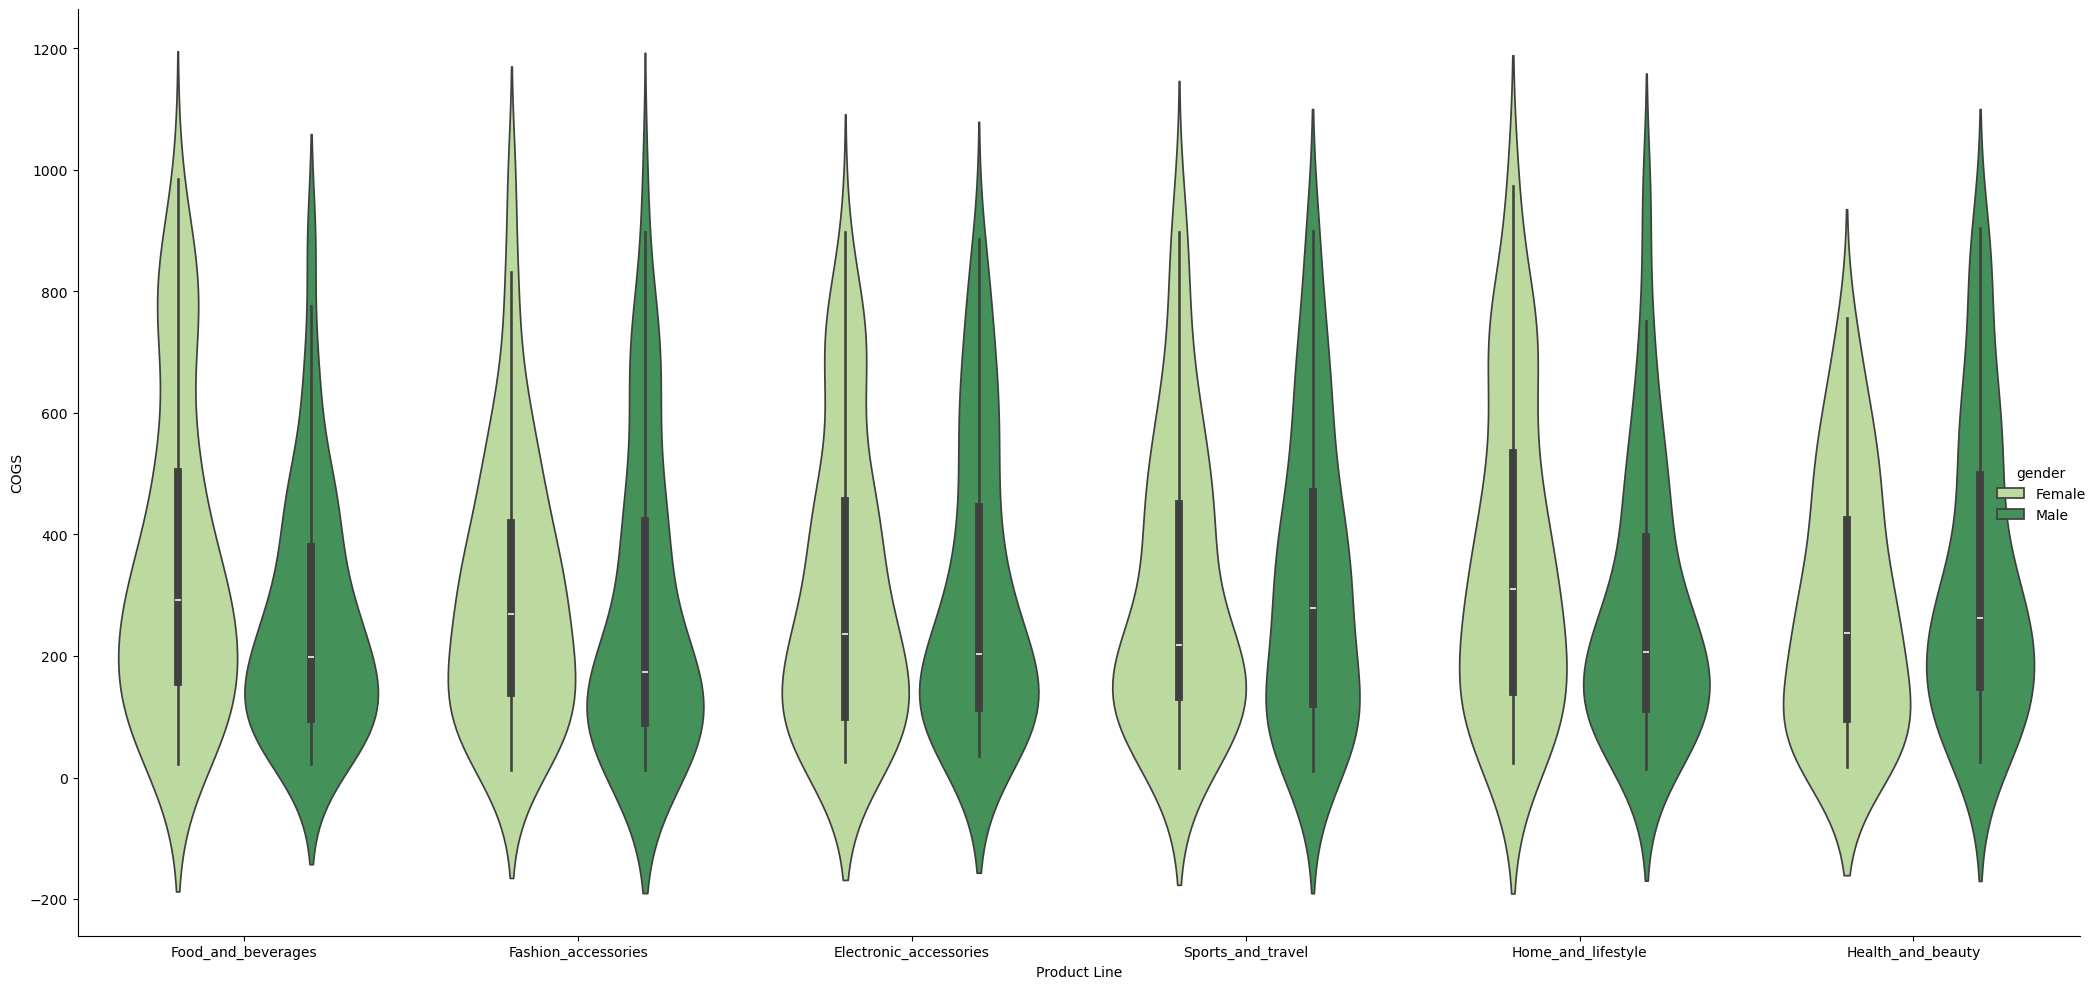

In [28]:
sns.catplot(data = df, x = "product_line", y = "cogs",hue = "gender", hue_order = ["Female","Male"],kind = "violin", height= 10, aspect = 2, palette="YlGn")
plt.tight_layout()
plt.xlabel("Product Line")
plt.ylabel("COGS")
plt.show()

In [ ]:

# if you want to programmatically, you can describe a function
def show_cat_plots(dataframe, cat_cols, y, hue=None, kind="box", plot=False, pallette = "autumn"):
    df = dataframe.copy()
    
    if plot:
        for col in cat_cols:
            sns.catplot(data=df, x=col, y=y, hue=hue, kind=kind, height=6, aspect=1.5, palette= pallette)
            plt.xlabel(col)
            if hue != col:
                title = f"{y} by {col}" + (f" and {hue}" if hue else "")
                plt.title(title, fontsize=14)
                plt.tight_layout()
                plt.show()
            else:
                title = f"{y} by" + (f" {hue}" if hue else "")
                plt.title(title, fontsize=14)
                plt.tight_layout()
                plt.show()
    
   
        

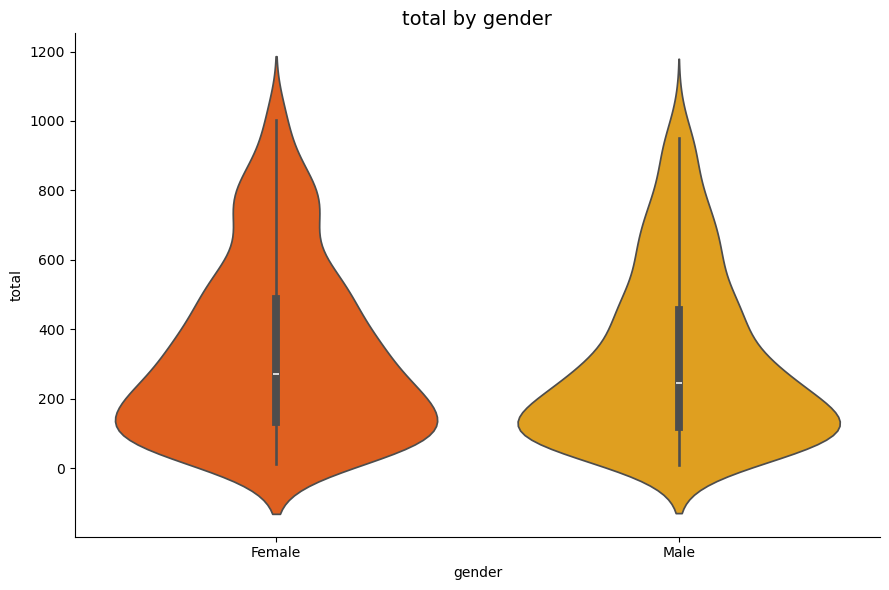

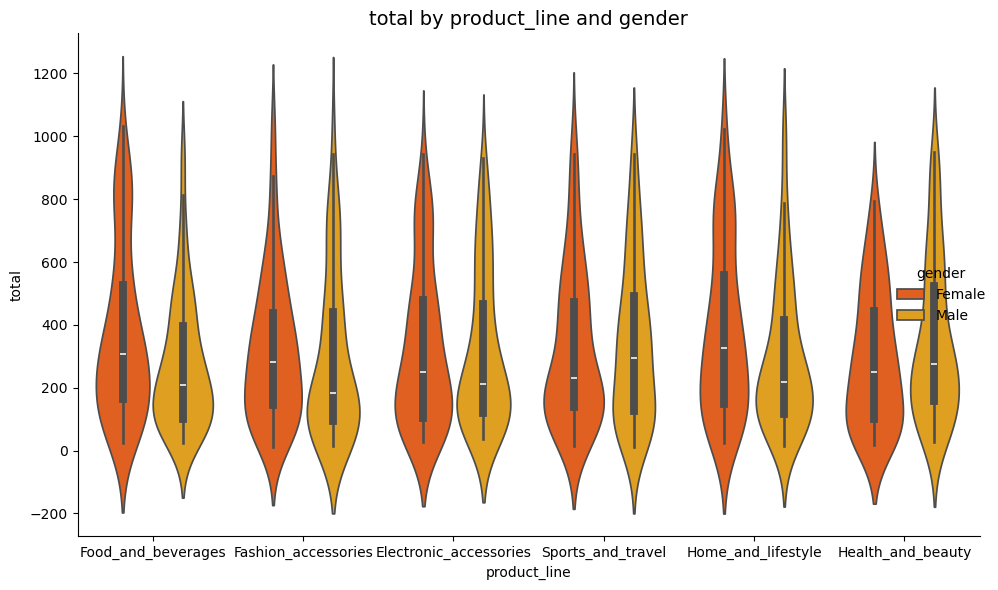

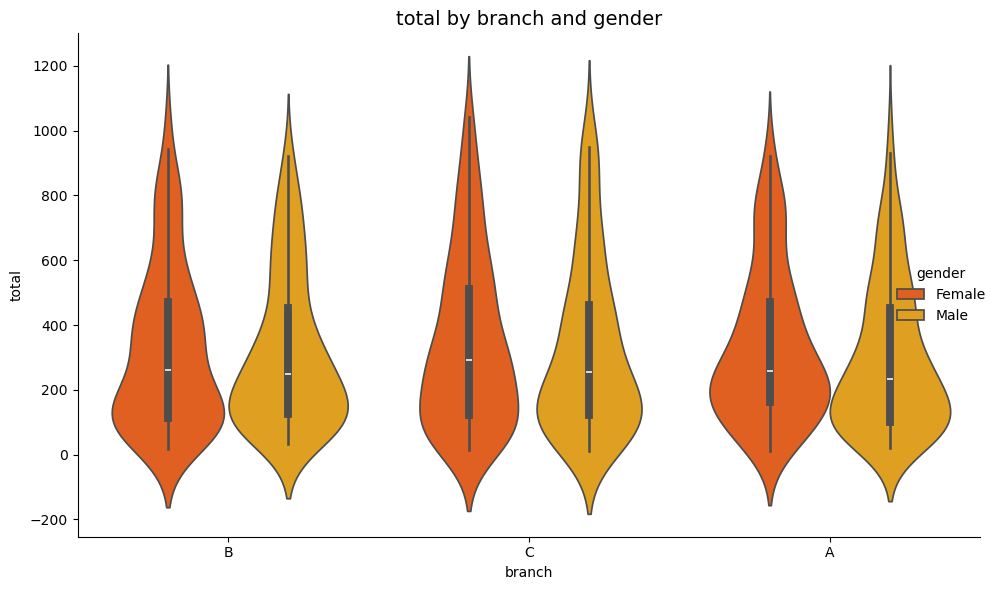

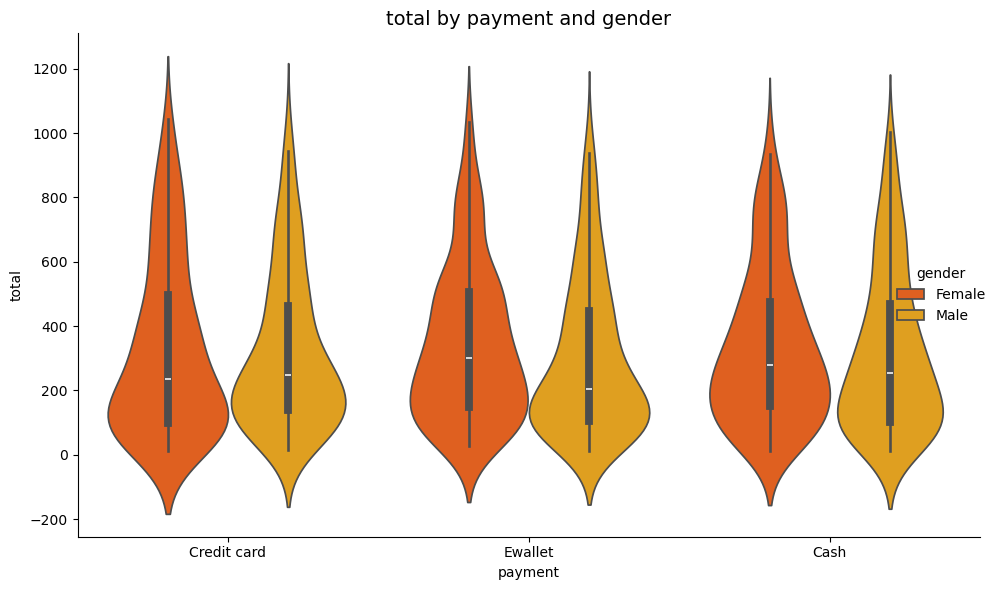

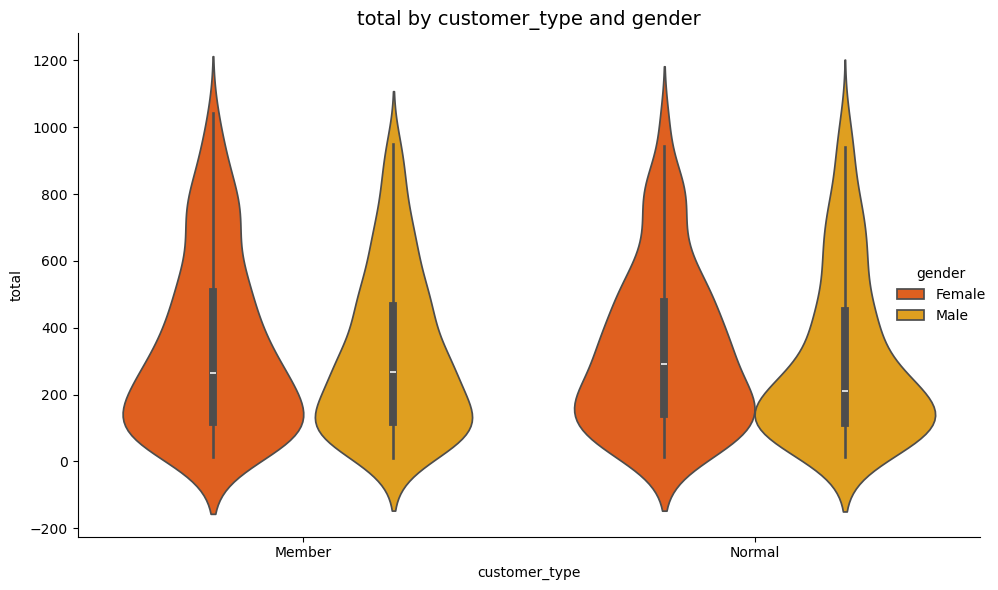

In [62]:
show_cat_plots(
    dataframe=df,
    cat_cols=["gender", "product_line", "branch", "payment", "customer_type"],
    y="total",
    hue="gender",       # Optional — you can also leave this out
    kind="violin",      # You can change to 'box', 'bar', 'strip', etc.
    plot=True
)


In [ ]:
# show different categorical graphs
def different_cat_cols(dataframe, cat_cols, y, hue=None, kind_list = ["violin"], plot=False, palette = "RdYlBu" ):
    df = dataframe.copy()
    if plot:
        for col in cat_cols:
            for kind in kind_list:
                if kind != "count":
                    sns.catplot(data=df, x=col, y=y, hue=hue, kind=kind, height=6, aspect=1.5, palette= palette)
                    plt.xlabel(col)
                    if hue != col:
                        title = f"{kind.title()} Plot of {y} by {col}" + (f" and {hue}" if hue else "")
                        plt.title(title, fontsize=14)
                        plt.tight_layout()
                        plt.show()
                    else:
                        title = f"{kind.title()} Plot of {y} by" + (f" {hue}" if hue else "")
                        plt.title(title, fontsize=14)
                        plt.tight_layout()
                        plt.show()
                else:
                    sns.catplot(data = df, x = col, hue = hue, kind = kind, height = 6, aspect= 1.5, palette= palette)
                    plt.xlabel(col)
                    if hue != col:
                        title = f"{kind.title()} by {col}" + (f" and {hue}" if hue else "")
                        plt.title(title, fontsize=14)
                        plt.tight_layout()
                        plt.show()
                    else:
                        title = f"{kind.title()} Plot of by" + (f" {hue}" if hue else "")
                        plt.title(title, fontsize=14)
                        plt.tight_layout()
                        plt.show()
                
        

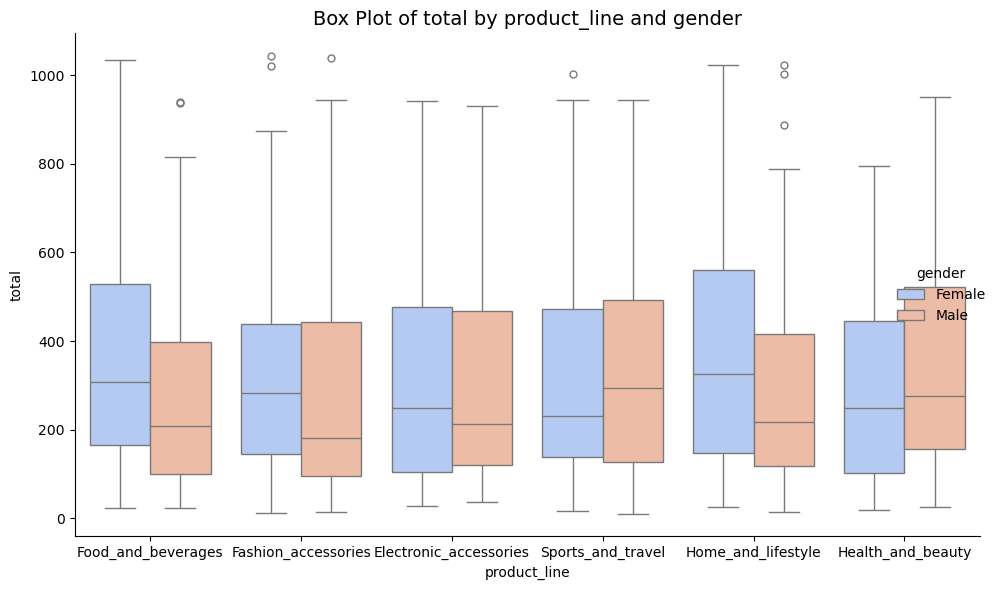

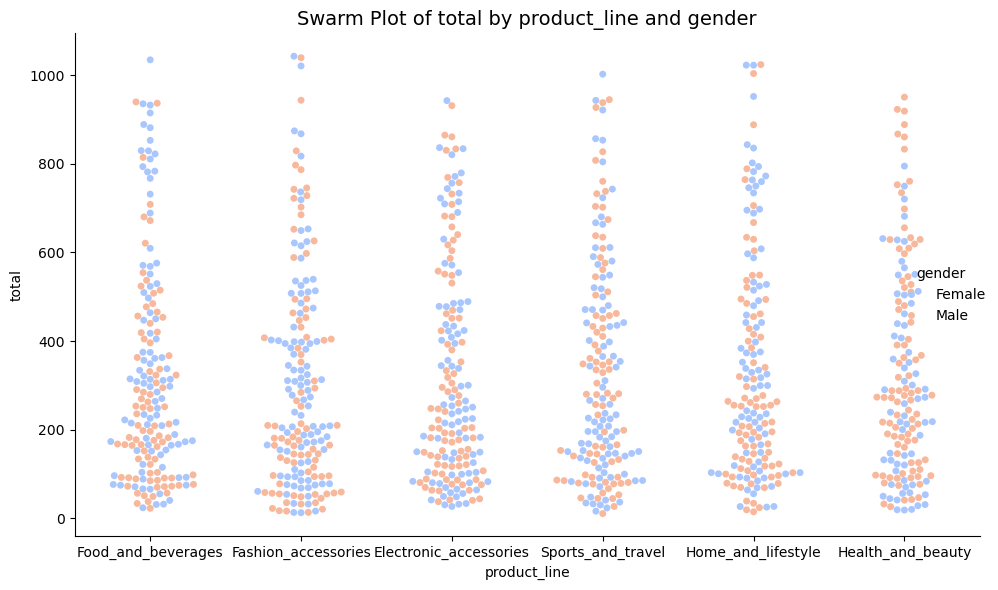

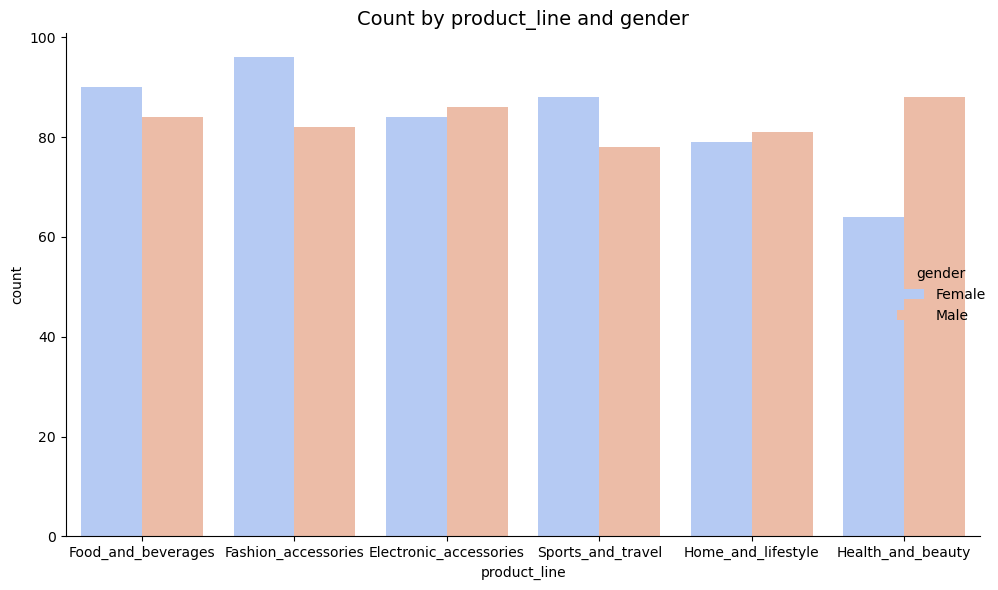

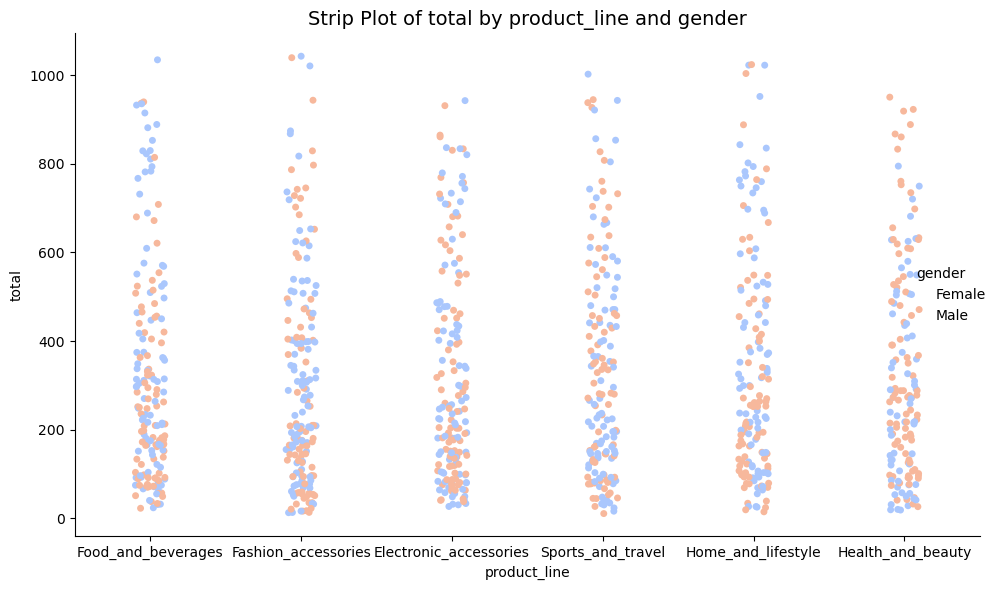

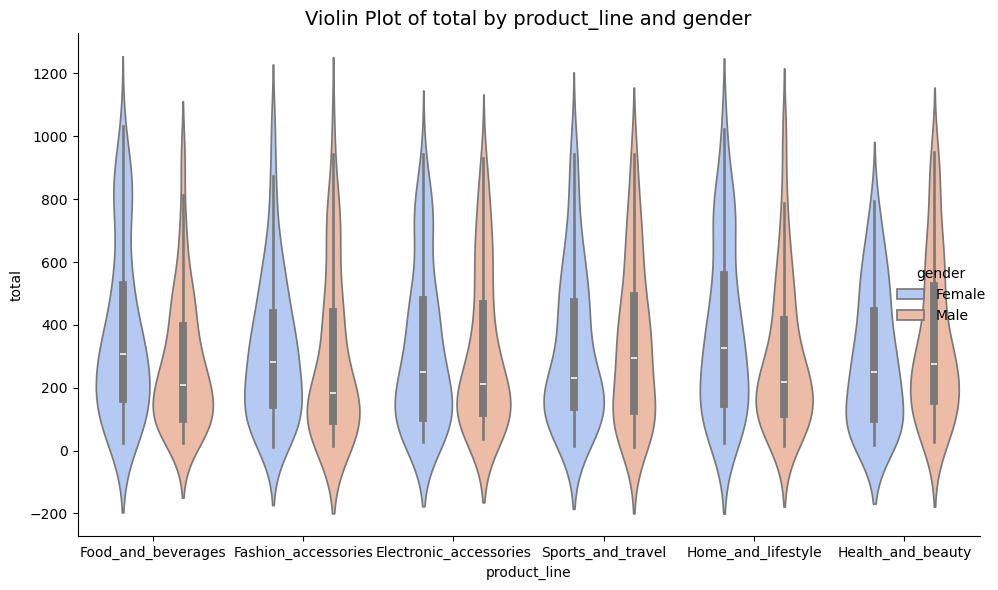

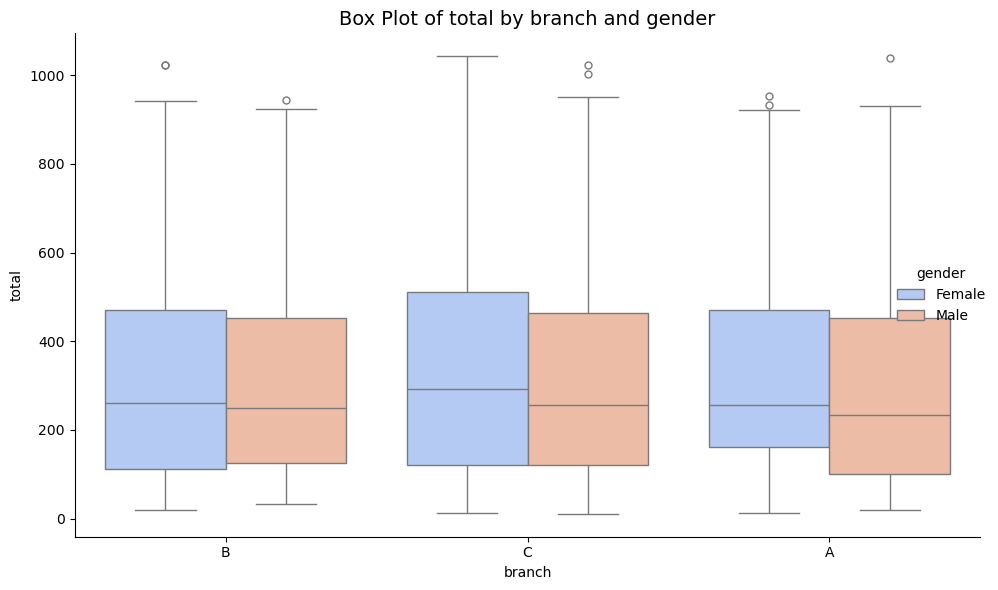

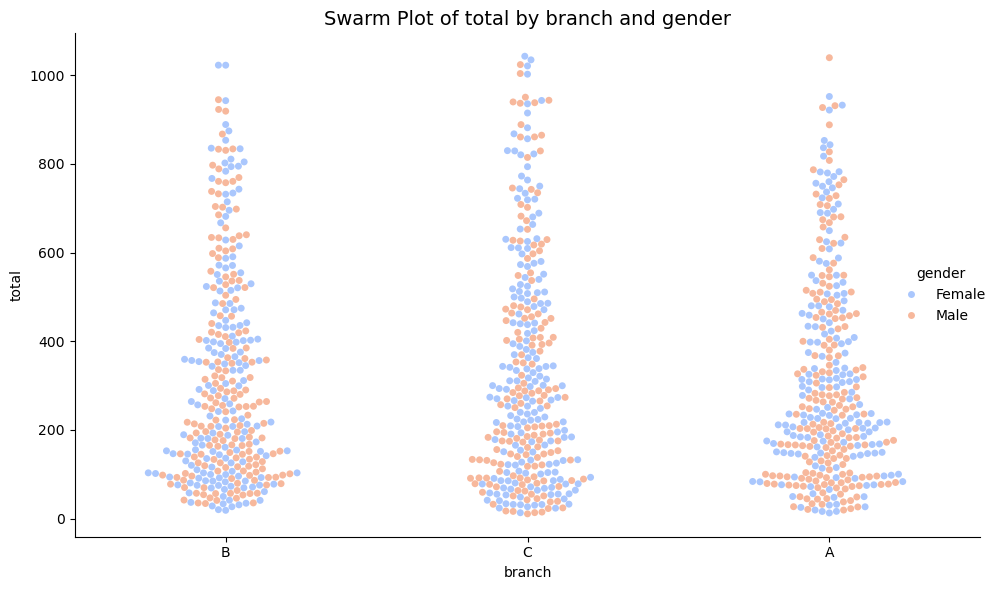

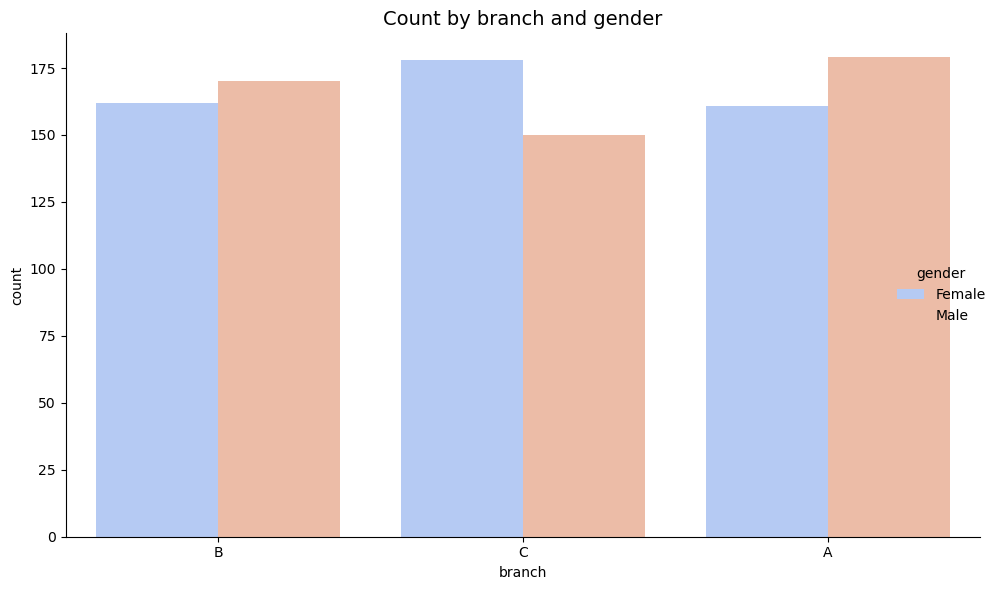

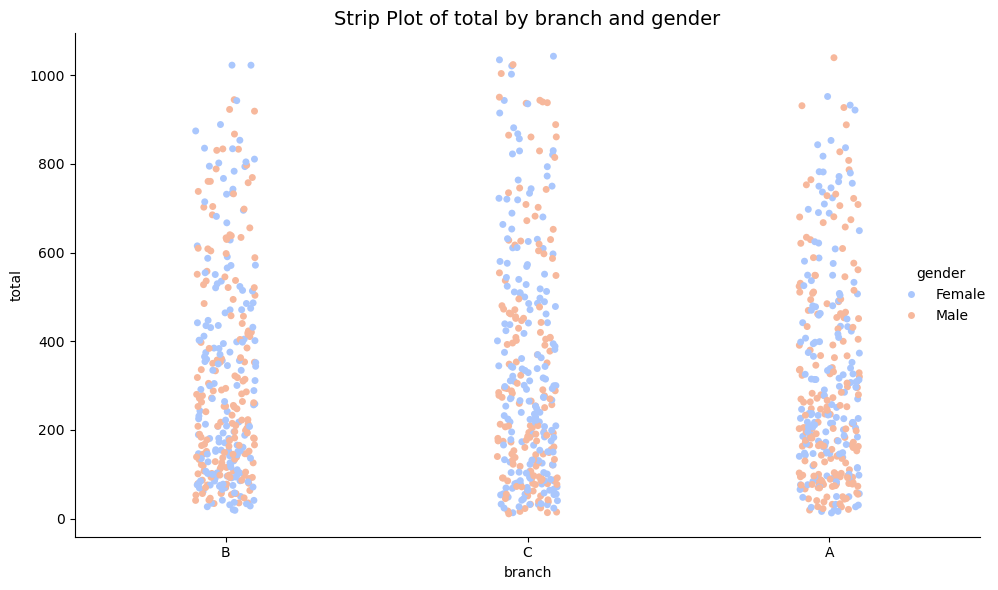

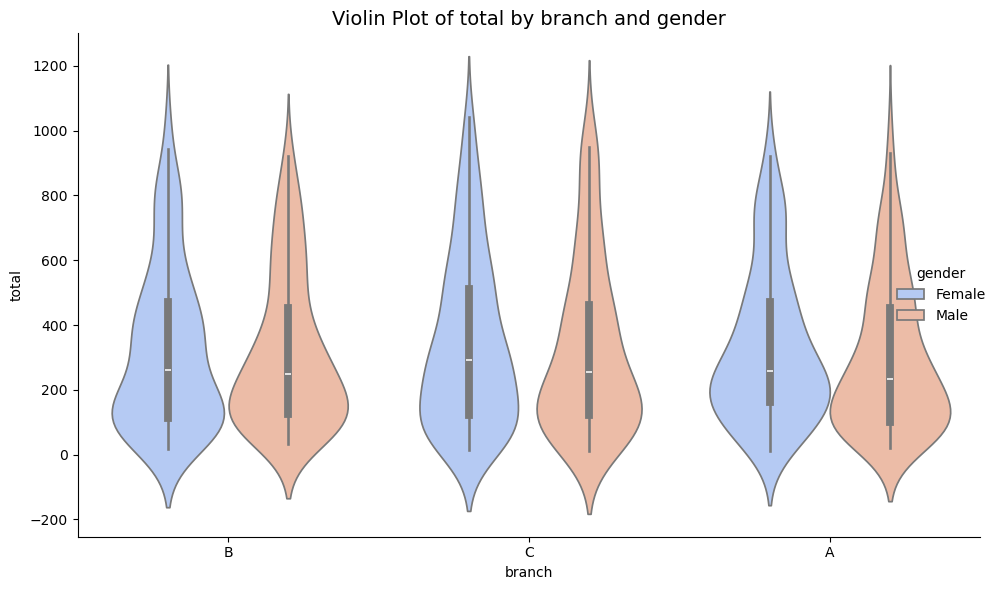

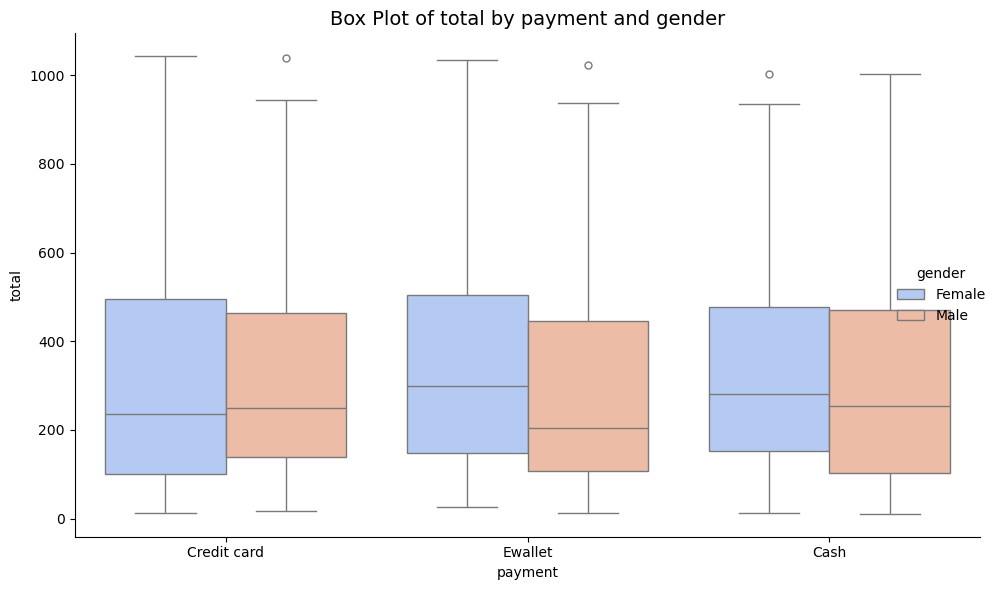

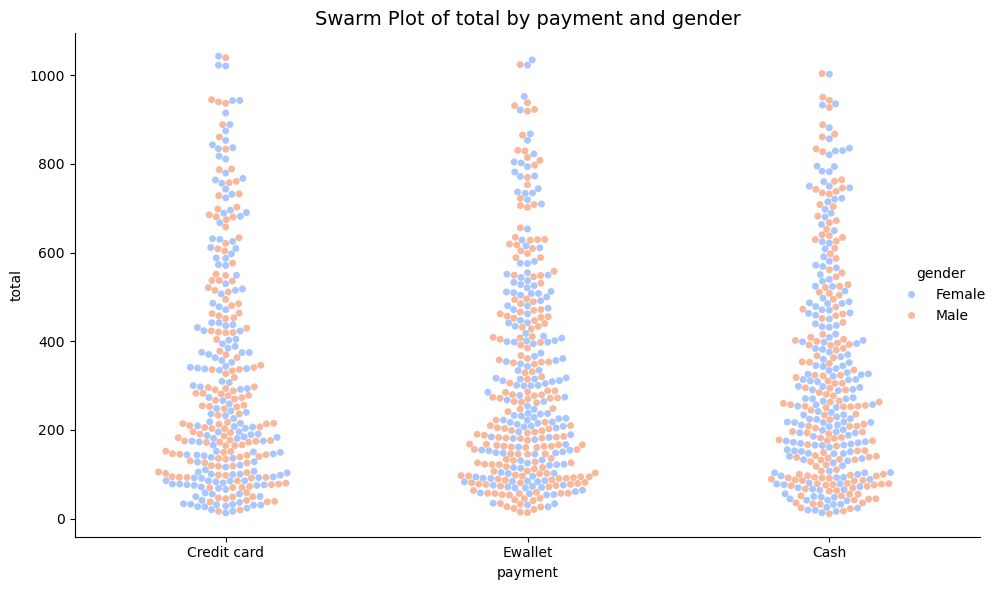

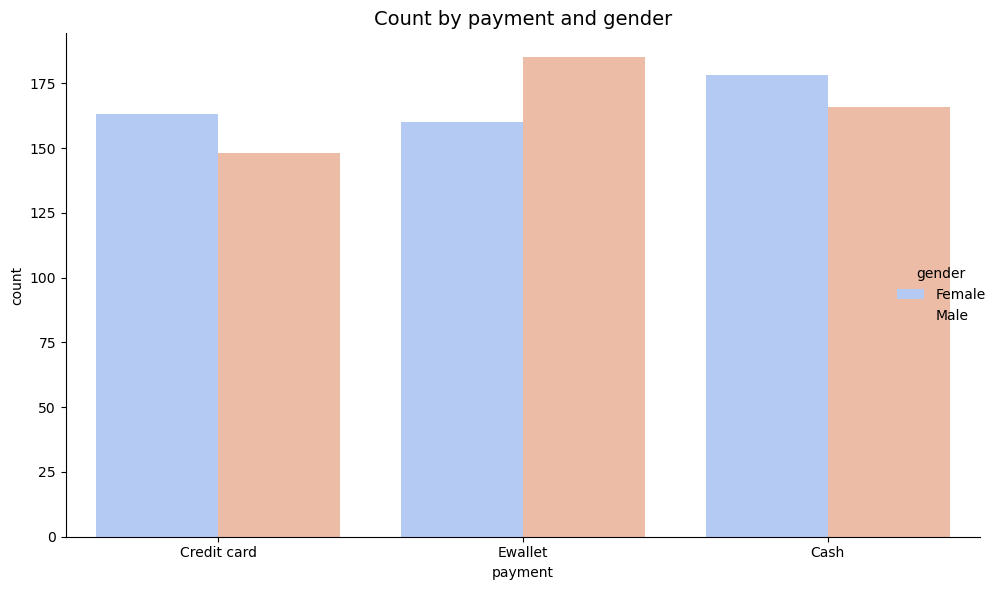

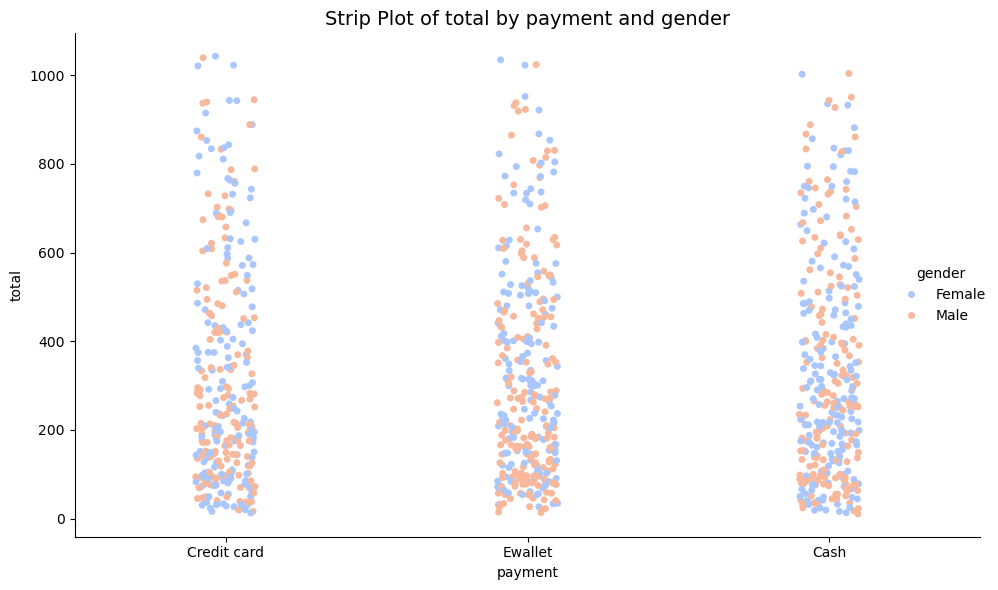

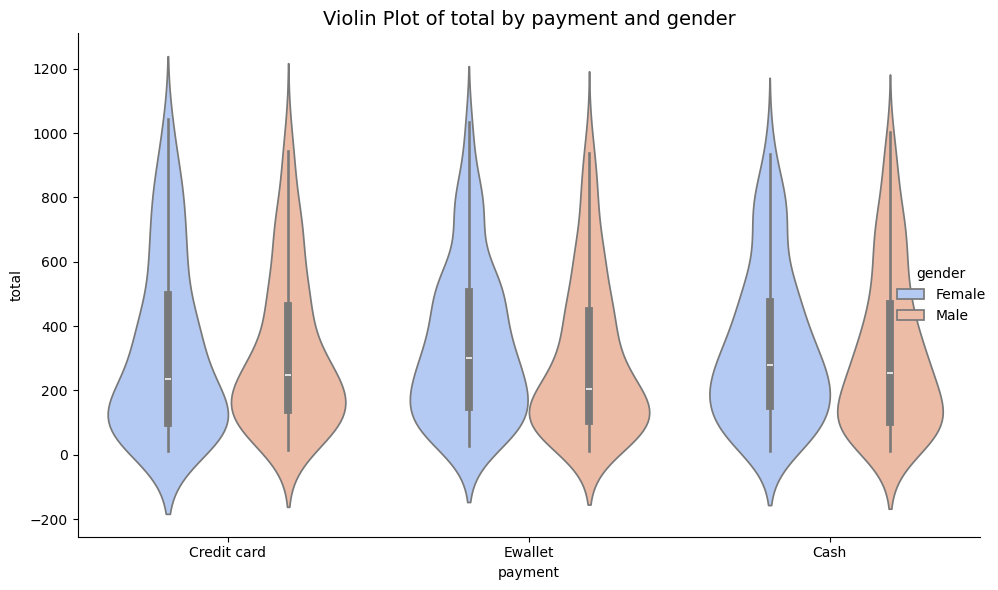

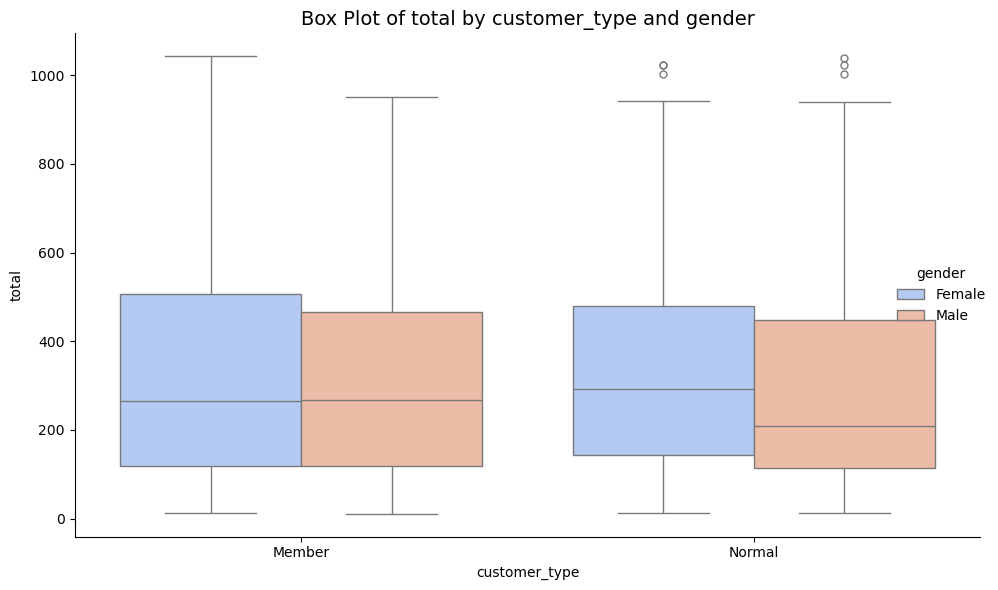

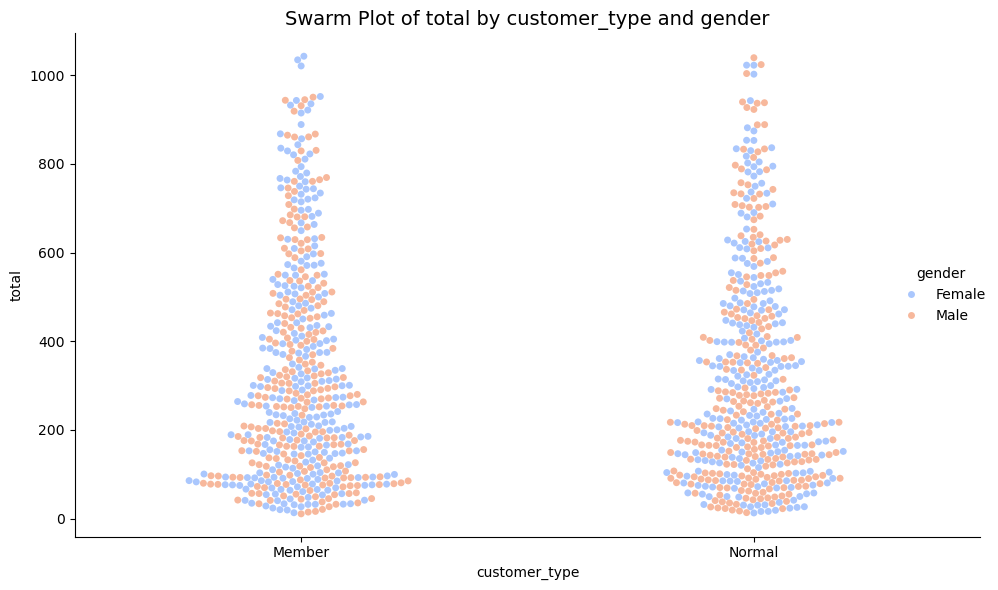

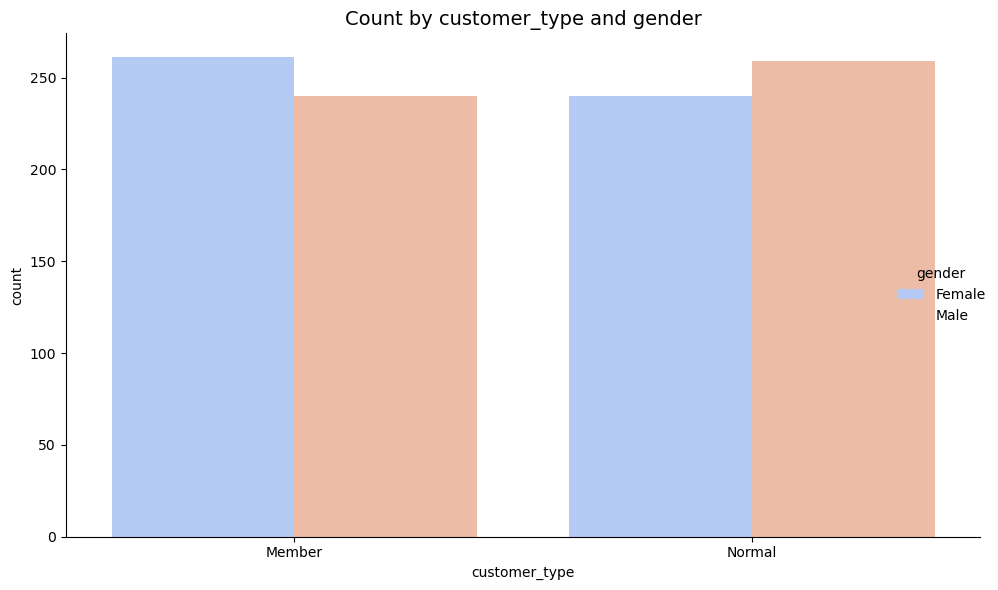

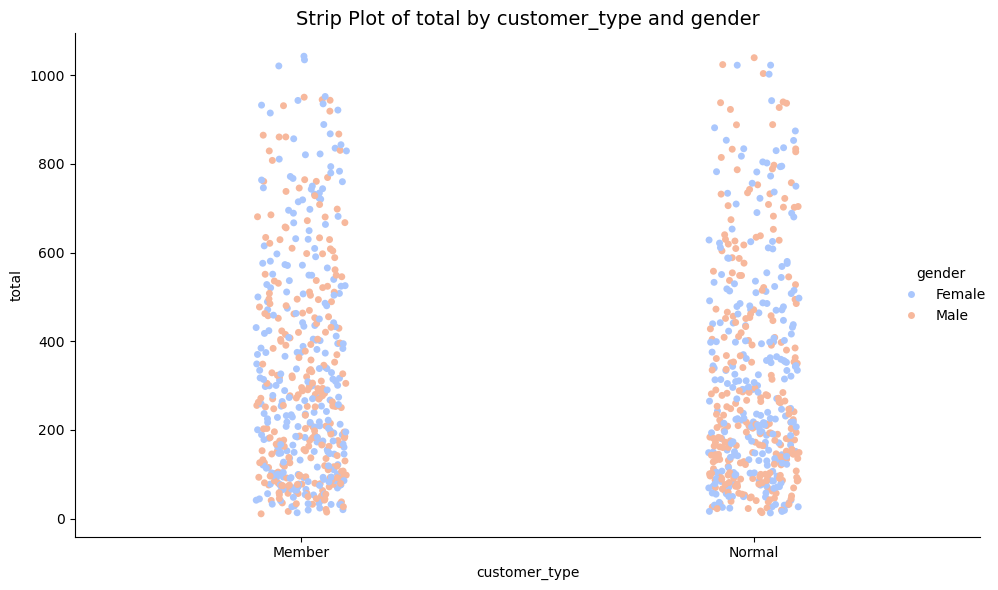

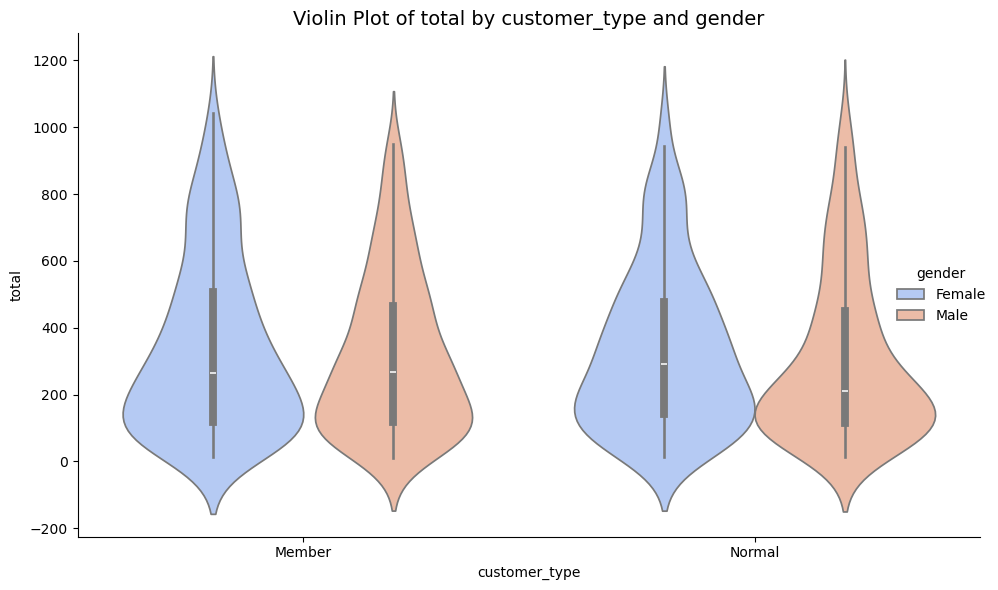

In [83]:
different_cat_cols(
    dataframe=df,
    cat_cols=["product_line", "branch", "payment", "customer_type"],
    y="total",
    hue="gender",       # Optional — you can also leave this out
    kind_list=["box","swarm","count","strip","violin"],      # You can change to 'box', 'bar', 'strip', etc.
    plot=True,
    palette="coolwarm"
)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14860\336518146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df, x = "payment", y = "cogs", col = "gender", kind = "box", row = "customer_type", palette = "copper")


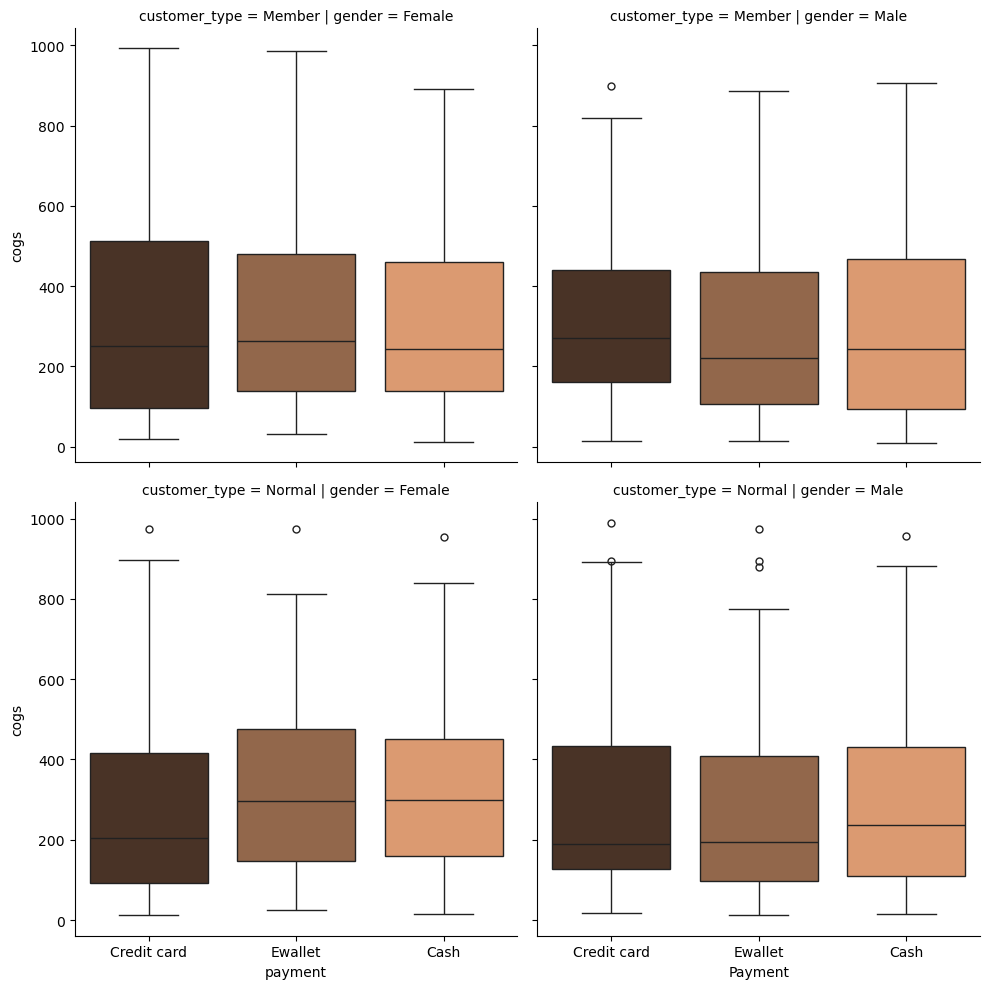

In [87]:
# row parameter
sns.catplot(data = df, x = "payment", y = "cogs", col = "gender", kind = "box", row = "customer_type", palette = "copper")
# plt.title("Total of COGS By Payment and Gender")
plt.xlabel("Payment")
plt.ylabel("COGS")
plt.tight_layout()
plt.show()
